In [16]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob

In [23]:
import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle/input\car-plate-detection\annotations\Cars0.xml
./kaggle/input\car-plate-detection\annotations\Cars1.xml
./kaggle/input\car-plate-detection\annotations\Cars10.xml
./kaggle/input\car-plate-detection\annotations\Cars100.xml
./kaggle/input\car-plate-detection\annotations\Cars101.xml
./kaggle/input\car-plate-detection\annotations\Cars102.xml
./kaggle/input\car-plate-detection\annotations\Cars103.xml
./kaggle/input\car-plate-detection\annotations\Cars104.xml
./kaggle/input\car-plate-detection\annotations\Cars105.xml
./kaggle/input\car-plate-detection\annotations\Cars106.xml
./kaggle/input\car-plate-detection\annotations\Cars107.xml
./kaggle/input\car-plate-detection\annotations\Cars108.xml
./kaggle/input\car-plate-detection\annotations\Cars109.xml
./kaggle/input\car-plate-detection\annotations\Cars11.xml
./kaggle/input\car-plate-detection\annotations\Cars110.xml
./kaggle/input\car-plate-detection\annotations\Cars111.xml
./kaggle/input\car-plate-detection\annotations\Cars112.xml
./k

In [24]:
IMAGE_SIZE = 200

In [28]:
img_dir = "./kaggle/input/car-plate-detection/images" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

In [29]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [30]:
path = './kaggle/input/car-plate-detection/annotations'
text_files = ['./kaggle/input/car-plate-detection/annotations/'+f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [32]:
resizeannotation("./kaggle/input/car-plate-detection/annotations/Cars147.xml")

[168, 126, 90, 93]

In [33]:
y[0]

[167, 129, 90, 93]

In [34]:
np.array(X).shape

(433, 200, 200, 3)

In [35]:
np.array(y).shape

(433, 4)

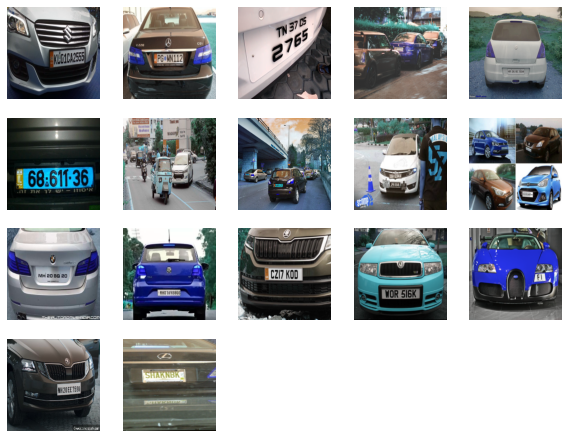

In [36]:
plt.figure(figsize=(10,20))
for i in range(0,17) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

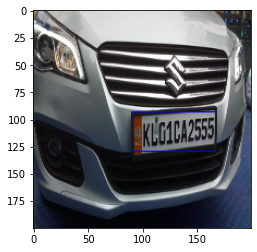

In [37]:
#Example with the first image of the dataset
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

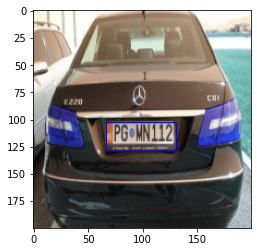

In [38]:
#Example with the second image of the dataset
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

In [39]:
#Transforming in array
X=np.array(X)
y=np.array(y)

In [40]:
#Renormalisation
X = X / 255
y = y / 255

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [42]:
from keras.models import Sequential

from keras.layers import Dense, Flatten

from keras.applications.vgg16 import VGG16

In [43]:
# Create the model
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 17,099,140
Trainable params: 2,384,452
Non

In [44]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [45]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
13/13 [==============================] - 21s 2s/step - loss: 0.0453 - accuracy: 0.4807 - val_loss: 0.0146 - val_accuracy: 0.2273
Epoch 2/50
13/13 [==============================] - 22s 2s/step - loss: 0.0107 - accuracy: 0.5656 - val_loss: 0.0090 - val_accuracy: 0.7273
Epoch 3/50
13/13 [==============================] - 22s 2s/step - loss: 0.0053 - accuracy: 0.6967 - val_loss: 0.0074 - val_accuracy: 0.8864
Epoch 4/50
13/13 [==============================] - 22s 2s/step - loss: 0.0036 - accuracy: 0.7943 - val_loss: 0.0047 - val_accuracy: 0.8636
Epoch 5/50
13/13 [==============================] - 22s 2s/step - loss: 0.0024 - accuracy: 0.8817 - val_loss: 0.0050 - val_accuracy: 0.7045
Epoch 6/50
13/13 [==============================] - 22s 2s/step - loss: 0.0018 - accuracy: 0.8817 - val_loss: 0.0043 - val_accuracy: 0.9545
Epoch 7/50
13/13 [==============================] - 20s 2s/step - loss: 0.0015 - accuracy: 0.9023 - val_loss: 0.0045 - val_accuracy: 0.9545
Epoch 8/50
13/13 [==

In [46]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 84.09%


In [47]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

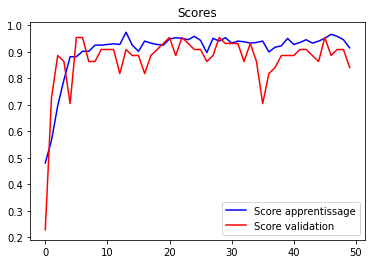

In [48]:
plot_scores(train)

In [49]:
 y_cnn = model.predict(X_test)

In [50]:
y_cnn.shape

(44, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

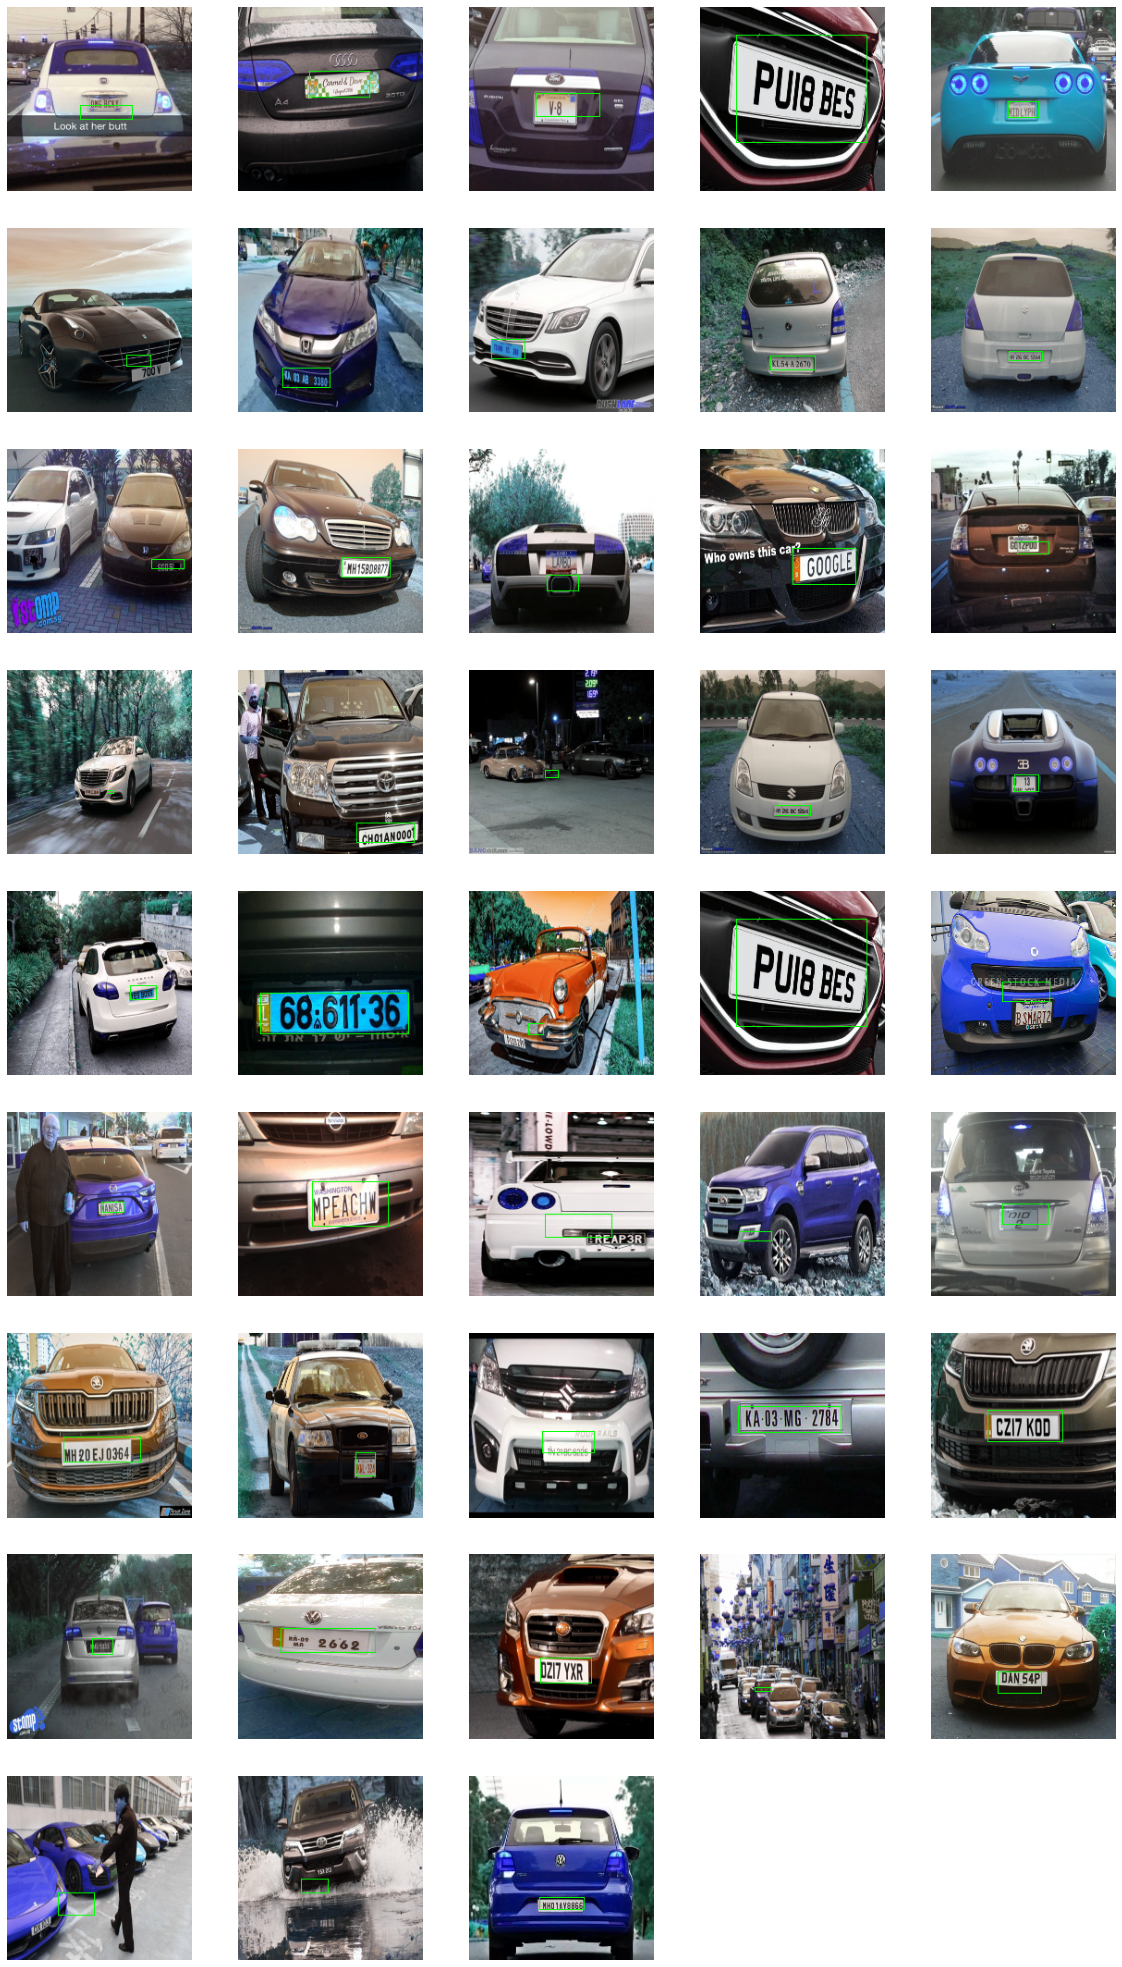

In [51]:
plt.figure(figsize=(20,40))
for i in range(0,43) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = y_cnn[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))
    plt.imshow(image)

In [52]:
model.save('car_model.h5')